# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.061486e+01     6.764637e+00
 * time: 0.004075050354003906
     1     2.838982e+01     5.097872e+00
 * time: 0.012202978134155273
     2     2.320874e+01     6.410146e+00
 * time: 0.03138399124145508
     3     1.399843e+01     1.463135e+00
 * time: 0.054553985595703125
     4     1.245241e+01     2.243240e+00
 * time: 0.07007908821105957
     5     1.181935e+01     1.680475e+00
 * time: 0.08558011054992676
     6     1.119712e+01     2.244740e+00
 * time: 0.10106515884399414
     7     1.055461e+01     3.144326e+00
 * time: 0.11649417877197266
     8     9.709154e+00     2.033589e+00
 * time: 0.1319441795349121
     9     8.929930e+00     1.049183e+00
 * time: 0.14713811874389648
    10     8.608906e+00     9.004901e-01
 * time: 0.1626441478729248
    11     8.472741e+00     4.250501e-01
 * time: 0.17836308479309082
    12     8.387317e+00     5.903010e-01
 * time: 0.19015812873840332
    13     8.342569e+00     3.259727e-01
 * time

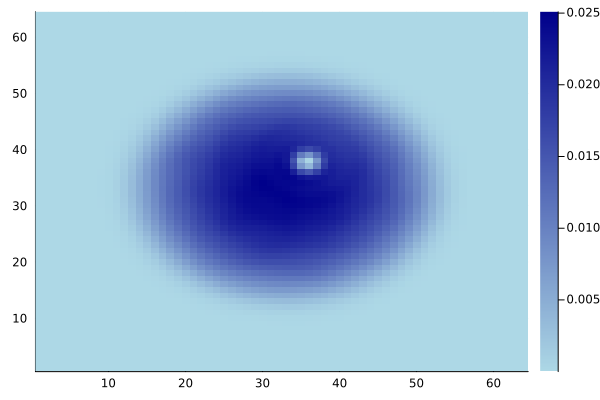

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)